## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!


# KINGS' COUNTY HOUSING PROJECT

## 1. BUSINESS UNDERSTANDING

### 1.1. Project Overview
This project aims to analyze house sales data in King County using regression modeling to estimate house prices and provide insights on how different features, including renovations might impact house prices.

### 1.2. Stakeholders:
1. Real Estate Agents; They will us the model to provide advice to homeowners on property values.
2. Homeowners; They will use the model to make informed decisions about buying,selling or renovating homes.
3. Real Estate Agencies; Intersted in increasing sales and client satisfaction by providing accurate home value estimates.

### 1.3. Business Problem:
Real Estate agencies need a model to estimate house prices and provide advice to homeowners about how  renovations might increase the estimated values of their homes potentially increasing sales and customer satisfaction.


### 1.4. Scope:
Inside Scope:
- Building a regression model to estimate house prices.
- Identifying key features that affect house prices
- Providing actionable insights fot homeownwers regarding renovations.
Outside Scope:
- Predicting exact future market trends.
- Estimating prices for houses outside King County.
- Considering economic or policy changes affecting the housing market.


### 1.5 Data Sources
The primary data source is the King County House Sales dataset(kc_house_data.csv).

<!-- Good questions for this stage include:

Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
What business problem(s) will this Data Science project solve for the organization?
What problems are inside the scope of this project?
What problems are outside the scope of this project?
What data sources are available to us?
What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?
Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't? -->

### Timeline
Data Understanding and Preparation:  
Modeling: 
Evaluation:
Presentation and Deployment: 


# Q(7)Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

## DATA UNDERSTANDING

Overview:This dataset contains information about King County House Sales with House price as the Target Variable and various features like bedrooms, bathrooms, sqft_living,condition, grade, etc as the Predictors.
Data Characteristics: Numeric variables(eg sqft_living, price number of bedrooms,number of bathrooms etc)and Categorical variables(eg condition, grade etc).

In [1]:
# Import relevant libraries
import pandas as pd 
import numpy as np 

# Visualisation
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import scipy.stats as stat 
from statsmodels.formula.api import ols 
import statsmodels.api as sm  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Load the dataset
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# Dispaly the first 5 rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# Display the last 5 rows of the dataset
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [7]:
# Summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
# Data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


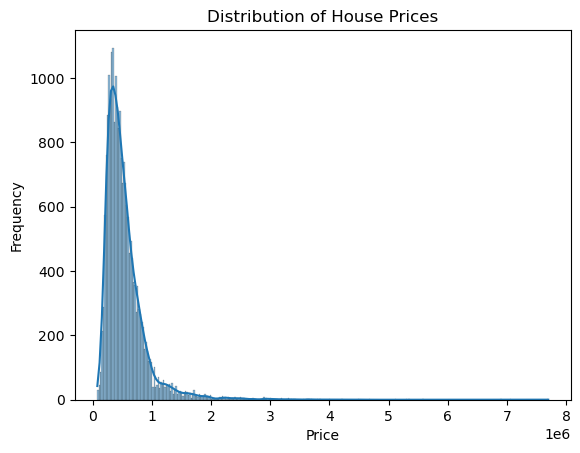

In [5]:
# Distribution of the target variables
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## DATA PREPARATION

### Data Cleaning

In [14]:
# Check for duplicates.
# df.duplicated()
df.loc[df.duplicated()]
# Implication: No duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
# Fill missing values
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].mode()[0])
df['view'] = df['view'].fillna(df['view'].mode()[0])
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Confirm that there are no more missing values
(df.isnull().sum().sum())  


0

### Data Type Conversion
We need to convert date to a datetime type and sqft_basement to a numeric type.

In [12]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert 'sqft_basement' to numeric, forcing errors to NaN and then filling them with 0
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce').fillna(0)


### Checking for Multicollinearity
Let's check the correlation matrix to identify multicollinearity among predictors.

In [24]:
# Check for multicollinearity
correlation_matrix = df.corr()
correlation_matrix


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
id,1.000000,0.005385,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,...,-0.002903,-0.025640,-0.015476,-0.015575,0.042285,0.009121,-0.014390,-0.019837,-0.015084,-0.003880
date,0.005385,1.000000,-0.003998,-0.016523,-0.034236,-0.034276,0.006337,-0.022333,0.000363,-0.001630,...,0.005553,0.011852,0.020180,0.019287,-0.007443,-0.022905,-0.022427,-0.009052,0.002531,-0.000824
price,-0.016772,-0.003998,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,...,-0.031618,-0.084549,-0.209463,-0.316053,0.004576,0.235859,0.340944,0.357589,0.291068,0.211806
bedrooms,0.001150,-0.016523,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,...,-0.068012,-0.113175,-0.239492,-0.104791,0.073140,0.160294,0.135766,0.116596,0.062257,0.039026
bathrooms,0.005162,-0.034236,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,...,-0.055599,-0.138740,-0.366185,-0.313457,0.189426,0.264756,0.272635,0.247293,0.159734,0.095118
sqft_living,-0.012241,-0.034276,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,...,-0.053935,-0.127198,-0.312486,-0.358915,0.071115,0.318499,0.369228,0.345964,0.238136,0.144424
sqft_lot,-0.131911,0.006337,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,...,0.000440,0.022931,-0.019116,-0.067791,-0.023923,0.049646,0.074421,0.077104,0.061699,0.007767
floors,0.018608,-0.022333,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,...,-0.029964,-0.080346,-0.230529,-0.308247,0.201188,0.244184,0.173943,0.118735,0.054276,0.021257
waterfront,-0.003599,0.000363,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,...,-0.002919,0.012691,-0.007301,-0.045482,-0.011317,0.007487,0.051514,0.068410,0.082899,-0.002025
view,0.011772,-0.001630,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,...,-0.003934,-0.013479,-0.059287,-0.147272,0.010612,0.094153,0.127753,0.140282,0.114607,0.051769


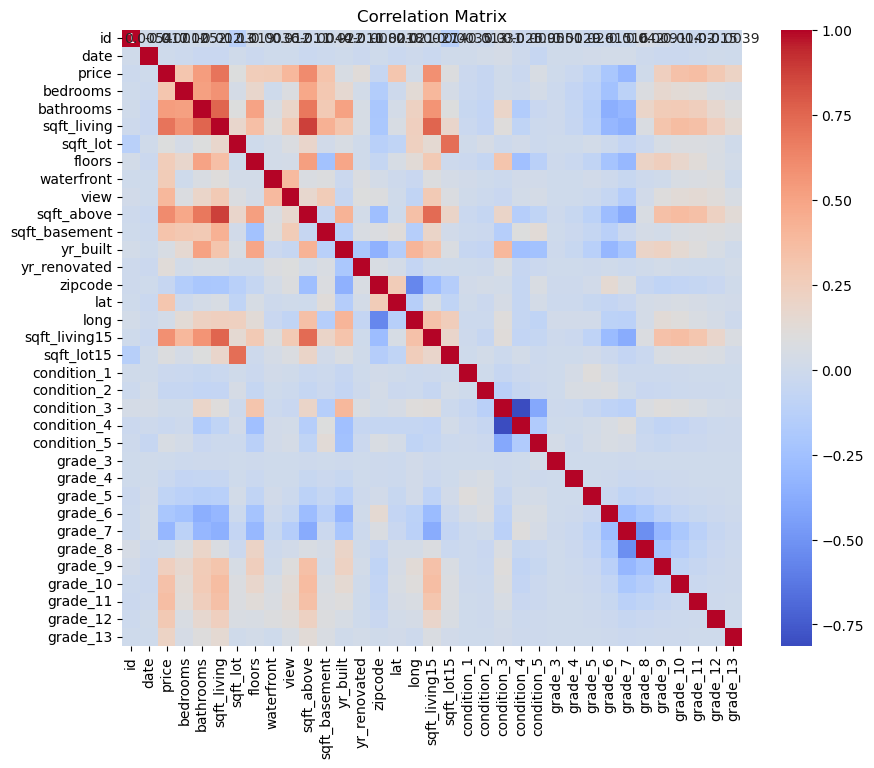

In [25]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Normalization
We will normalize numerical columns to ensure they are on a similar scale.

In [16]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to be normalized
numeric_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
scaler = StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])


### Categorical Encoding
We need to convert categorical variables (condition, grade) into numeric format using one-hot encoding.

In [22]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['condition', 'grade'])


In [23]:
# Display the first few rows of the prepared dataset
print(df.head())

# Confirm the data types
print(df.info())


           id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00    -0.980652   
1  6414100192 2014-12-09  538000.0         3       2.25     0.533369   
2  5631500400 2015-02-25  180000.0         2       1.00    -1.427234   
3  2487200875 2014-12-09  604000.0         4       3.00    -0.131057   
4  1954400510 2015-02-18  510000.0         3       2.00    -0.436040   

   sqft_lot  floors  waterfront  view  ...  grade_4  grade_5  grade_6  \
0 -0.228182     1.0         0.0   0.0  ...    False    False    False   
1 -0.189739     2.0         0.0   0.0  ...    False    False    False   
2 -0.123139     1.0         0.0   0.0  ...    False    False     True   
3 -0.243878     1.0         0.0   0.0  ...    False    False    False   
4 -0.169503     1.0         0.0   0.0  ...    False    False    False   

   grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  
0     True    False    False     False     False     Fals

In [42]:
# Feature selection: select relevant features
# features

# features = list(set(df.columns) - (set(unw) + set('price')))
# features

features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']
target = 'price'

In [48]:
X = df[features]
y = df[target]